<a href="https://colab.research.google.com/github/sndpwrites/Kaggle-competition/blob/main/Titanic%20-%20Machine%20Learning%20from%20Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sndpwrites","key":"fa4553058a50eccdfd01e77edd521f39"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 34.7MB/s]


In [3]:
import pandas as pd
import zipfile

with zipfile.ZipFile('titanic.zip') as z:
    # List all files in the archive
    print(z.namelist())
    # Assuming 'train.csv' is in the archive
    with z.open('train.csv') as f:
        df = pd.read_csv(f)

['gender_submission.csv', 'test.csv', 'train.csv']


In [4]:
df.head()
df.drop(columns=['Name','Ticket', 'Cabin'], inplace=True)

In [5]:
categorical_features = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

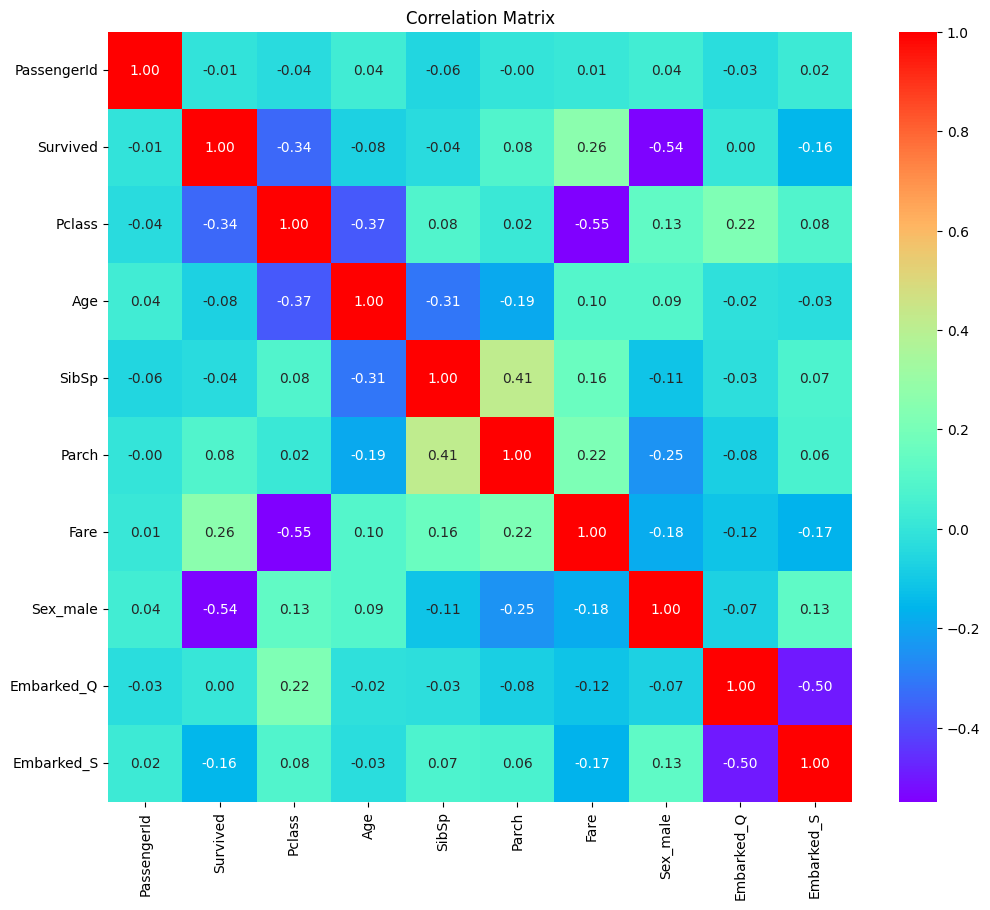

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.fillna(df.mode(), inplace=True)
df.fillna(df.mean(), inplace=True)

In [17]:
y = df['Survived']
X = df.drop(columns=['Survived'])

In [18]:
print(y.value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

In [20]:
lr.fit(X,y)

LogisticRegression(max_iter=1000)

In [21]:
with zipfile.ZipFile('titanic.zip') as z:
    # List all files in the archive
    print(z.namelist())
    # Assuming 'train.csv' is in the archive
    with z.open('test.csv') as f:
        df_test = pd.read_csv(f)

['gender_submission.csv', 'test.csv', 'train.csv']


In [22]:
categorical_features = ['Sex', 'Embarked']
df_test = pd.get_dummies(df_test, columns=categorical_features, drop_first=True)

In [23]:
df_test.drop(columns=['Name','Ticket', 'Cabin'], inplace=True)

In [25]:
df_test.fillna(df_test.mode(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
y_pred = lr.predict(df_test)

In [26]:
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
output.to_csv('submission.csv', index=False)

In [27]:
!kaggle competitions submit -c titanic -f submission.csv -m "Message"

100% 2.77k/2.77k [00:00<00:00, 8.11kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster